<a href="https://colab.research.google.com/github/ikathllen/PDS-SSVEP/blob/master/PDS_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SSVEP - Conceito: 

O SSVEP é a atividade do córtex cerebral resultante da aplicação de estímulos visuais repetitivos que cintilam em frequências constantes, e através de sistemas de aquisição de sinal, quando o usuário foca o olhar no estímulo aplicado é possível observar um aumento da atividade cerebral na mesma frequência na região do córtex visual.

SSVEP - Objetivo: 

Ver como o sinal se comporta antes e depois de um filtro passa faixa, sendo que deve ter maior destaque a frequência de 8HZ (frequência de estimulação visual utilizada).
Foi utilizado como base de dados a coleta disponível em: http://www.bakardjian.com/work/ssvep_data_Bakardjian.html


In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz
from scipy import signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1 - Definir o sinal em tempo discreto;

Os sinais obtidos já estão em tempo discreto, onde n = nº de amostras

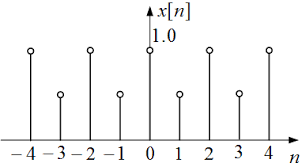


Sabemos que os dados de análise são discretos, é necessário obter o dataset que escolhi. Como o arquivo está em MATLAB para carregar ele no python precisa importar a biblioteca SCIPY e colocar o comando: scipy.io.loadmat. 

In [ ]:
# lendo os arquirvos .MAT que estão no drive
mat = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/SSVEP/PDS final - Fablena/SSVEP_8Hz_Trial1_SUBJ1.MAT')

# mostrando as chaves do arquivo .MAT para saber a chave de interesse
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'EEGdata'])


Mostrando o 'mat.keys' é possível ver as chaves do arquivo .MAT e a chave em que guarda os dados de EEG para uso é:  EEGdata

In [ ]:
# variável para guardar os valores da chave 'EEGdata' do arquivo .MAT
eeg_data = mat['EEGdata']

# criando uma variável para guardar o tamanho das amostras de eeg_data
dados = int(eeg_data.size/128)
dados

6330

In [ ]:
# armazenando os canais de interesse: 13, 23, 24, 25, 26, 81
canais = np.array([12, 22, 23, 24, 25, 80]) # Considerando que iniciam em Zero

# criando uma array de zeros com o tamanho de 6 canais e 6330 amostras
canal_interesse = np.zeros(shape = (6, dados))

for i in range(len(canais)):
  # Inserindo os canais na lista
  canal_interesse[i, :] = np.array([eeg_data[canais[i], :]])
canal_interesse.shape

(6, 6330)

In [ ]:
# criando uma variável de tempo para designar o tamanho completo do experimento 
t1 = np.linspace(0, 24.7, dados)

# criando uma variável para estabelecer um determinado período de tempo, exemplo: de 12s à 15s
tempo = (t1>=12)&(t1<=15)

O gráfico da esquerda mostra todos as amostras (6330) no domínio do tempo em que esse tempo é de 24,7s disponibilizado pelo pesquisador em: http://www.bakardjian.com/work/ssvep_data/readme.txt

O gráfico da esquerda é um 'zoom' do gráfico da direita, porém no tempo de 12s à 15s.

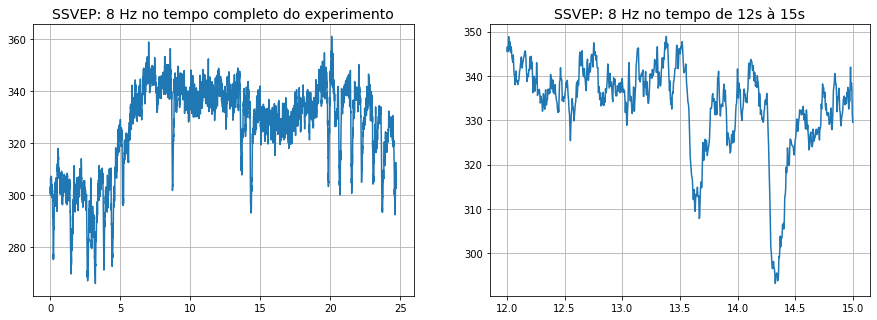

In [ ]:
plt.subplots(figsize=(15, 5)) 
# plotagem de todos os valores de amostras e com o tempo completo do experimento
plt.subplot(1, 2, 1) 
plt.plot(t1, canal_interesse[2, :])
plt.title('SSVEP: 8 Hz no tempo completo do experimento', fontsize = 14)
plt.grid()
# plotagem das amostras no intervalo de tempo de 12s à 15s
plt.subplot(1, 2, 2) 
plt.plot(t1[tempo], canal_interesse[2, tempo])
plt.title('SSVEP: 8 Hz no tempo de 12s à 15s', fontsize = 14)
plt.grid()
plt.show()

2.1 - Definir o filtro anti-aliasing: Caso a frequência de amostragem não obedeça o teorema de Nyquist, deve-se colocar um filtro analógico passa-baixas antes da aquisição de dados, que limite a máxima frequência do sinal à metade da frequência de amostragem;

Para o anti-aliasing foi utilizado na pesquisa: filtro analógico fixo de primeira ordem, -3dB a 3,6 kHz. Entretanto, considere-se para o anti-aliasing os sinais com double sampling.

2.2 - Frequência de amostragem apropriada: Taxa de amostragem é a quantidade de amostras de um sinal analógico coletadas em uma determinada unidade de tempo, para conversão em um sinal digital. Por se tratar de frequênica é medida em Hertz (Hz);

In [ ]:
# frequência de amostragem disponibilizada em: http://www.bakardjian.com/work/ssvep_data/readme.txt
fs = 256

3- Analise do sinal discreto no domínio da frequência;

3.1 - Magnitude do sinal;

A amplitude do sinal, em dada frequência do domínio, é dada pela magnitude do número complexo correspondente, enquanto a fase do sinal é dado pelo ângulo desse número com o eixo real. Neste caso nas aplicações dos espectros de frequência, a fase não é importante.



O cálculo da magnitude foi utilizado com uma função que está linguagem de programação, python, disponibiliza. 

Como parâmetro foram passados: uma sequência de dados que está no (canal_interesse[2, :]), um escalar que é a frequência de amostragem (Fs) e quais lados do espectro devem ser retornados (twosided).

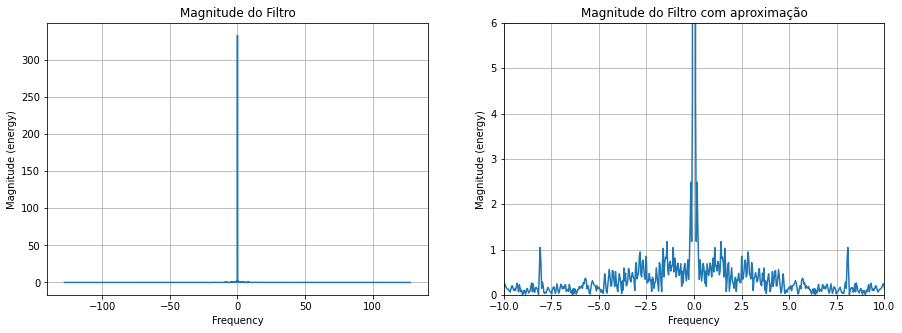

In [ ]:
plt.subplots(figsize=(15, 5)) 
plt.subplot(1, 2, 1)  
plt.title('Magnitude do Filtro')  
plt.magnitude_spectrum(canal_interesse[2, :], Fs=fs, sides='twosided')
plt.grid()
plt.subplot(1, 2, 2) 
plt.title('Magnitude do Filtro com aproximação')  
plt.magnitude_spectrum(canal_interesse[2, :], Fs=fs, sides='twosided')
plt.xlim([-10, 10])
plt.ylim([0, 6])
plt.grid()
plt.show()

3.2 - Densidade Espectral de Potência (PSD) do sinal;

A função densidade espectral de potência descreve a decomposição em frequência dos dados através da densidade espectral do seu valor quadrático médio. O valor quadrático médio de uma amostra no intervalo de frequência pode ser obtido por meio de um filtro passa-banda.



Para o cálculo da Densidade Espectral de Potência (PSD) utilizou-se a função do próprio python.

Como parâmetro foram passados: uma sequência de dados que está no (canal_interesse[2, :]) mas em 2 períodos de tempo (2s à 5s, 12s à 15s) em que para cada período calculou-se a média, outro parâmetro foi um escalar que é a frequência de amostragem (Fs).

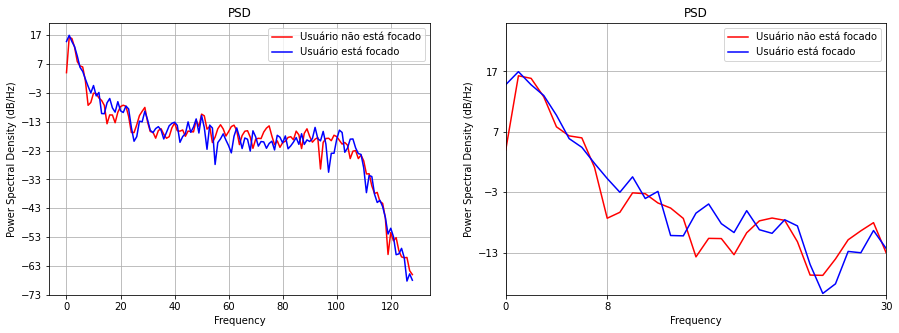

In [ ]:
plt.subplots(figsize=(15, 5)) 
plt.subplot(1, 2, 1)
x = canal_interesse[2, 512:1280] #2s à 5s
x = x-np.mean(x)
y = canal_interesse[2, 3072:3840] #12s à 15s
y = y-np.mean(y)
plt.psd(x, Fs=fs, c = 'r', label = 'Usuário não está focado');
plt.psd(y, Fs=fs, c = 'b', label = 'Usuário está focado');
plt.legend(loc='upper right')
plt.title('PSD')
plt.subplot(1, 2, 2)
x = canal_interesse[2, 512:1280]
x = x-np.mean(x)
y = canal_interesse[2, 3072:3840]
y = y-np.mean(y)
plt.psd(x, Fs=fs, c = 'r', label = 'Usuário não está focado');
plt.psd(y, Fs=fs, c = 'b', label = 'Usuário está focado');
plt.legend(loc='upper right')
plt.title('PSD')
plt.xlim([0, 30])
plt.ylim([-20, 25])
plt.xticks([0, 8, 30])
plt.show()

3.3 - FFT do sinal discreto;

Esta função calcula a Transformada de Fourier (DFT) discreta de n pontos unidimensional com o algoritmo eficiente da Transformada de Fourier Rápida (FFT).
Como parâmetro: matriz de entrada (canal_interesse[2, :]).



In [ ]:
canal_fft = np.fft.fft(canal_interesse[2, :])
# retorna as frequencias de amostras da fft
freq_canal = np.fft.fftfreq(canal_interesse[2, :].size, d = 1/fs)

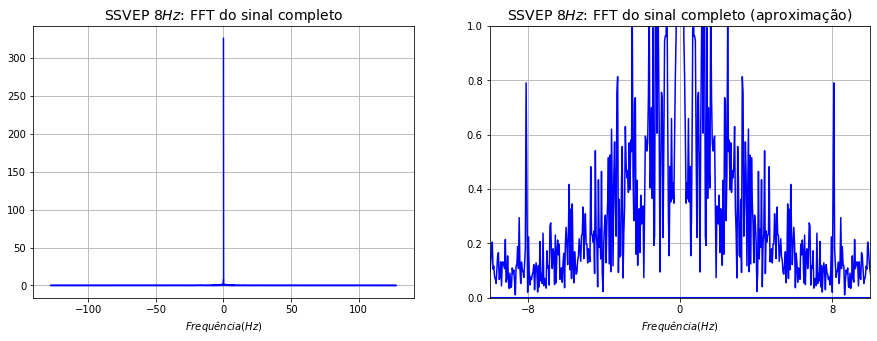

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1) 
plt.plot(freq_canal, np.absolute(canal_fft)/dados, c = 'b')
plt.title('SSVEP $8Hz$: FFT do sinal completo', fontsize = 14)
plt.xlabel('$Frequência (Hz)$')
plt.grid()
plt.subplot(1, 2, 2) 
plt.plot(freq_canal, np.absolute(canal_fft)/dados, c = 'b')
plt.title('SSVEP $8Hz$: FFT do sinal completo (aproximação)', fontsize = 14)
plt.xlabel('$Frequência (Hz)$')
plt.xlim([-10, 10])
plt.ylim([0, 1])
plt.xticks([-8, 0, 8])
plt.grid()
plt.show()

4 - Definir a banda de frequência de interesse de acordo com a aplicação selecionada;

Foi escolhido o filtro Butterworth, pois ele é um tipo de filtro de processamento de sinal projetado para ter uma resposta de frequência a mais plana possível na banda passante. Com base nas análises e no objetivo do projeto, verificou-se que o filtro de Butterworth desejado é o Passa-faixa (passa-banda).

Filtro Passa-faixa: Um filtro passa-faixa (ou passa-banda) é um dispositivo que permite a passagem das frequências de uma certa faixa e rejeita (atenua) as frequências fora dessa faixa.

In [ ]:
# criando um filtro passa faixa e filtrando os sinais SSVEP
b,a = butter(5,[6, 10],'bandpass',fs = 256)

4.1 - Resposta em frequência;

Resposta em frequência é a análise do comportamento de um sistema quanto ao seu ganho numa certa faixa de frequência.

Para essa análise utilizou-se a função signal.freqz que tem como parâmetro os dados do filtro feito anteriormente. 

In [ ]:
w, h = signal.freqz(b, a)

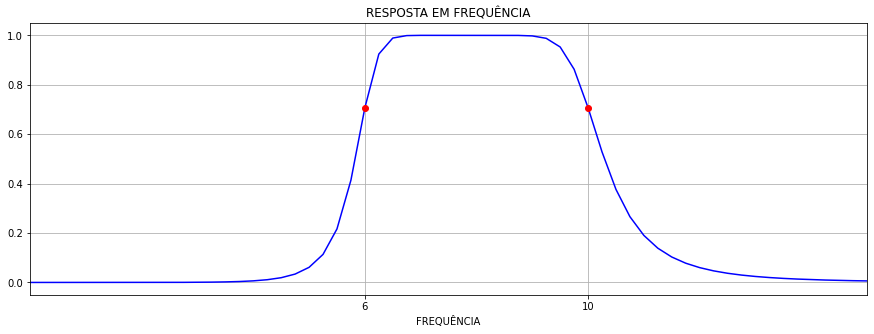

In [ ]:
plt.subplots(figsize=(15, 5)) 
plt.title('RESPOSTA EM FREQUÊNCIA')
plt.plot(0.5*fs*w/(np.pi), abs(h), 'b')
plt.plot(6, 0.5*np.sqrt(2), 'ro')
plt.plot(10, 0.5*np.sqrt(2), 'ro')
plt.xticks([6, 10])
plt.xlabel('FREQUÊNCIA')
plt.xlim([0, 15])
plt.grid()
plt.show()

5 - Análise do sinal de saída do filtro digital

A realização desta etapa é considerado os mesmos conceitos mencionados nos tópicos anteriores, sendo que com a especificação de que a análise agora será com o resultado do filtro passa-faixa. 

5.1 - Densidade Espectral de Potência (PSD) do sinal filtrado;

In [ ]:
eeg_m = np.mean(canal_interesse[2, tempo])
media_eeg = canal_interesse[2, tempo] - eeg_m
# dados filtrados da banda
filtro_ssvep = lfilter(b, a, media_eeg)
filtro_ssvep.shape

(769,)

In [ ]:
eeg_m2 = np.mean(canal_interesse[2, 512:1280])
media_eeg2 = canal_interesse[2, 512:1280] - eeg_m2
# dados filtrados da banda
filtro_ssvep2 = lfilter(b, a, media_eeg2)
filtro_ssvep2.shape

(768,)

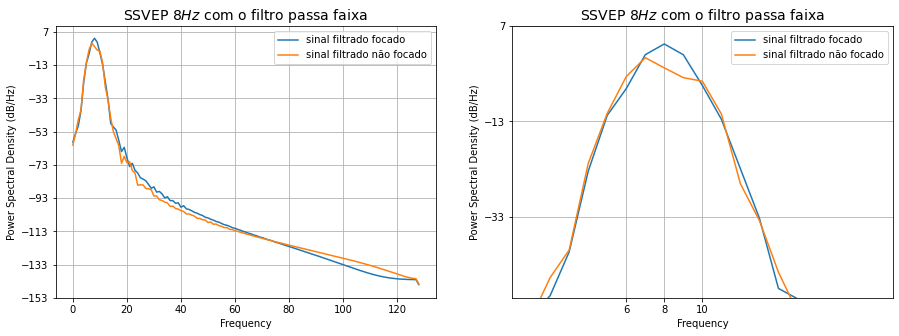

In [ ]:
plt.subplots(figsize=(15, 5)) 
plt.subplot(1, 2, 1)
plt.title('SSVEP $8Hz$ com o filtro passa faixa', fontsize = 14)
plt.psd(filtro_ssvep, Fs= fs, label = 'sinal filtrado focado');
plt.psd(filtro_ssvep2, Fs= fs, label = 'sinal filtrado não focado');
plt.legend(loc='upper right')
y = canal_interesse[2, tempo]
plt.subplot(1, 2, 2)
plt.title('SSVEP $8Hz$ com o filtro passa faixa', fontsize = 14)
plt.psd(filtro_ssvep, Fs= fs, label = 'sinal filtrado focado');
plt.psd(filtro_ssvep2, Fs= fs, label = 'sinal filtrado não focado');
plt.legend(loc='upper right')
plt.xlim([0, 20])
plt.ylim([-50, 7])
plt.xticks([6, 8, 10])
plt.show()

6.1 - FFT do sinal filtrado

In [ ]:
ssvep_fft = np.fft.fft(filtro_ssvep)
# retorna as frequencias de amostras da fft
freq = np.fft.fftfreq(filtro_ssvep.size, d = 1/fs)

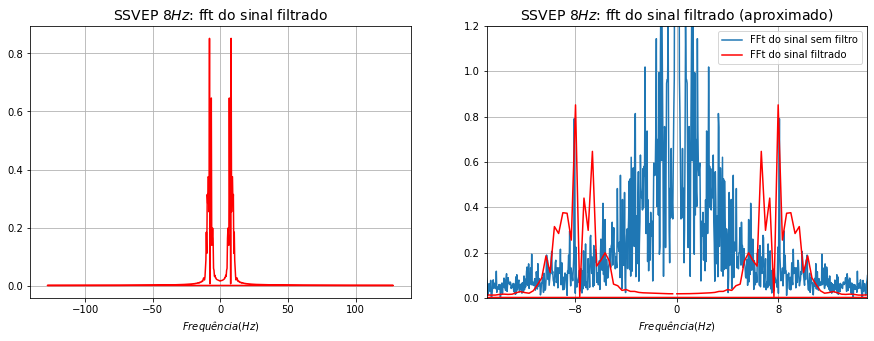

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1) 
plt.plot(freq, np.absolute(ssvep_fft)/filtro_ssvep.size, c = 'r')
plt.title('SSVEP $8Hz$: fft do sinal filtrado', fontsize = 14)
plt.xlabel('$Frequência (Hz)$')
plt.grid()
plt.subplot(1, 2, 2) 
plt.plot(freq_canal, np.absolute(canal_fft)/dados, label = 'FFt do sinal sem filtro')
plt.plot(freq, np.absolute(ssvep_fft)/filtro_ssvep.size, c = 'r', label = 'FFt do sinal filtrado')
plt.title('SSVEP $8Hz$: fft do sinal filtrado (aproximado)', fontsize = 14)
plt.xlabel('$Frequência (Hz)$')
plt.legend(loc='upper right')
plt.xlim([-15, 15])
plt.ylim([0, 1.2])
plt.xticks([-8, 0, 8])
plt.grid()
plt.show()